# Исследование рынка недвижимости

**Цель исследования -** выявить или опровергнуть наличие взаимосвязей между различными характеристиками квартир, представленных на рынке недвижимости Санкт-Петербурга, и определить, какие параметры квартир влияют на ценообразование при их продаже. <br>
    
**Ход исследования:**
1. Обзор данных: загрузка датафрейма и первичное знакомство с его содержанием, построение общей гистрограммы.
2. Предобработка данных: поиск и обработка пропущенных значений, явных и неявных дубликатов, поиск и устранение аномалий и выбивающихся значений, добавление новых столбцов. 
3. Исследовательский анализ данных: более подробное изучение основных параметров квартир, определение факторов, влияющих на стоимость объектов, определение населенных пунктов с самой высокой и низкой стоимостью квадратного метра, выявление связи между ценой петербургских квартир и расстоянием до центра города.
4. Выводы.

## Обзор данных

In [ ]:
#импортирую нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#загружаю данные, добавляю табуляцию 
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

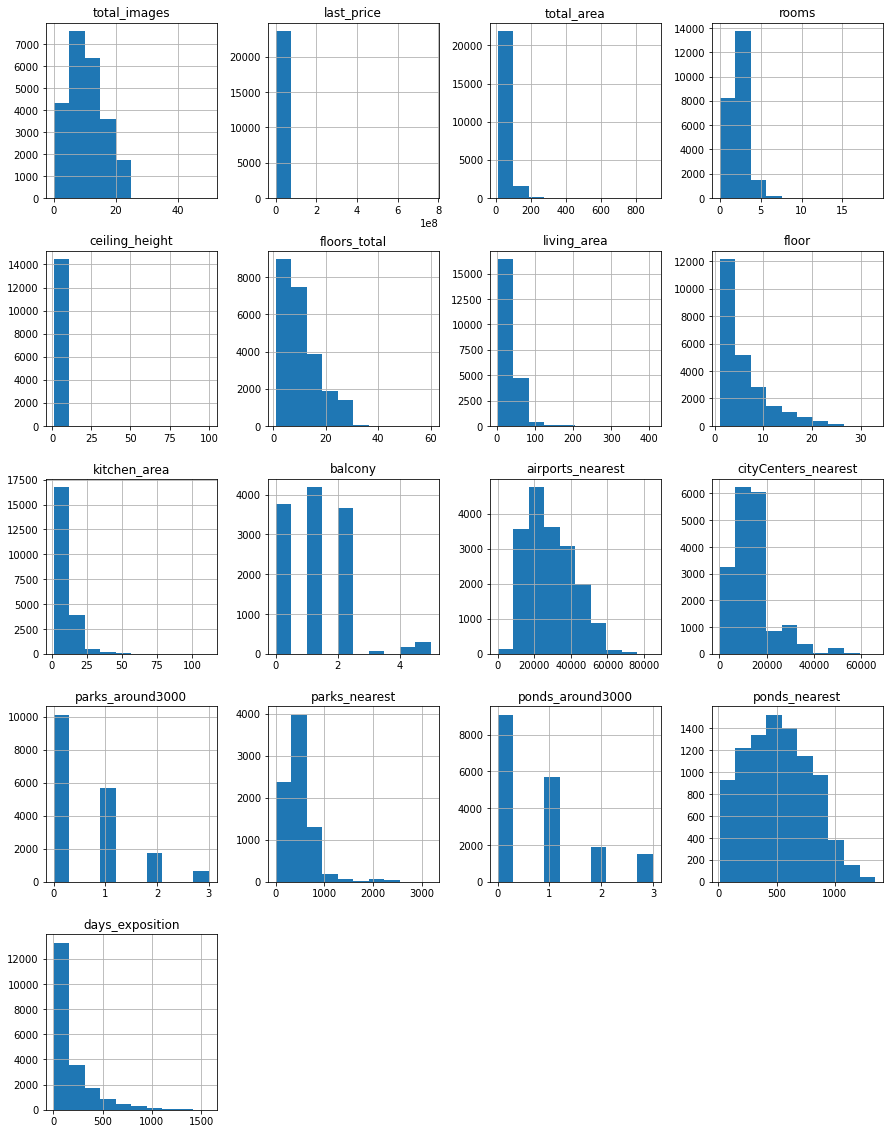

In [ ]:
#изучаю полученный датафрейм
pd.set_option('display.max_columns', None)
display(df.head(50))
display(df.info())
#строю общую гистограмму для всех числовых столбцов таблицы
df.hist(figsize=(15, 20))
plt.show()

## Предобработка данных

Для начала проверим данные на наличие явных дубликатов.

In [ ]:
#ищу явные дубликаты
display(df.duplicated().sum()) 

0

Явные дубликаты отсутствуют.

Теперь найдем и обработаем пропущенные значения. 

In [ ]:
#определяю, в каких столбцах есть пропуски 
display(df.isna().sum().sort_values(ascending=False))
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Больше всего пропусков в столбце *is_apartment*. Так как ответ подразумевает булевый тип данных, будем считать, что если продавец не указал True, то значение по умолчанию - False.

In [ ]:
#заполняю пропуски
df['is_apartment'] = df['is_apartment'].fillna(False)
display(df['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64

Также будем считать, что если продавец не указал наличие балкона, то по умолчанию количество балконов - 0.

In [ ]:
#заполняю пропуски
df['balcony'] = df['balcony'].fillna(0)
display(df['balcony'].value_counts())

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [ ]:
#ищу взаимосвязь между высотой потолков и другими числовыми показателями
display(df['ceiling_height'].corr(df['total_area']))
display(df['ceiling_height'].corr(df['last_price']))
display(df['ceiling_height'].corr(df['days_exposition']))

0.09549044852366358

0.08543030982842605

0.019090919473899973

Значительной корреляции между высотой пололков и каким-либо другим показателем найти не удалось, поэтому заполним данное значение медианой по населенному пункту, а оставшийся 121 пропуск - медианой столбца.

In [ ]:
#заполняю пропуски
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna())& (df['locality_name'] == locality_name), 'ceiling_height'] = median   
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

Незначительное количество пропусков в столбцах *locality_name* и *floors_total*. Количество этажей можно заменить на медианное значение столбца, а вот квартиры без местоположения лучше удалить, чтобы не искажать данные, так как по косвенным показателям (кроме расстояния от центра), сложно определить, где может находиться квартира. 

In [ ]:
#заполняю пропуски
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
df = df[~df['locality_name'].isna()]

In [ ]:
#ищу взаимосвязь между количеством дней и другими числовыми показателями
display(df['days_exposition'].corr(df['last_price']))
display(df['days_exposition'].corr(df['total_area']))
display(df['days_exposition'].corr(df['total_images']))

0.08093749597559405

0.149571078040978

-0.02741523740042966

Пропуски в *days_exposition* лучше не заполнять, так как значительной корреляции с каким-либо из других показателей выявить не удалось. 

Площадь кухни (*kitchen_area*) и жилого пространства (*living_area*) можно посчитать по медиане этих значений у квартир со схожим метражом. Для этого необходимо категоризировать квартиры по общей площади (*total_area*).

In [ ]:
#категоризирую квартиры по метражу и заполняю пропущенные значения 
def flat_type(area):
    if area < 20:
        return 'А'
    if area > 20 and area < 30:
        return 'B'
    if area > 30 and area < 40:
        return 'C'
    if area > 40 and area < 50:
        return 'D'
    if area > 60 and area < 70:
        return 'E'
    if area > 70 and area < 80:
        return 'F'
    return 'G'
df['flat_type'] = df['total_area'].apply(flat_type)
for i in df['flat_type'].unique():
    df.loc[(df['flat_type'] == i)&(df['living_area'].isna()),'living_area'] = \
    df.loc[(df['flat_type'] == i), 'living_area'].median()
for i in df['flat_type'].unique():
    df.loc[(df['flat_type'] == i)&(df['kitchen_area'].isna()),'kitchen_area'] = \
    df.loc[(df['flat_type'] == i), 'kitchen_area'].median()

In [ ]:
#проверяю наличие квартир, где общая площадь получилась меньше суммы жилой площади и площади кухни
display(len(df[df['total_area'] < (df['kitchen_area'] + df['living_area'])]))

221

В 221 случае после заполнения пропусков общая площадь оказалась меньше суммы 
жилой площади и площади кухни. Количество подобных случаев незначительно, так что можно удалить их без ущерба для результатов исследования. 

In [ ]:
#удаляю квартиры, где общая площадь получилась меньше суммы жилой площади и площади кухни
df = df[df['total_area'] >= (df['kitchen_area'] + df['living_area'])]

Количество пропусков в столбцах *airports_nearest*, *cityCenters_nearest*, *parks_around3000* и *ponds_around3000* практически одинаковое, необходимо проверить встречаются ли эти пропуски в одних и тех же случаях вместе.

In [ ]:
#проверяю количество квартир, у которых пропуски в 4 столбцах с расстоянием 
display(df[(df['airports_nearest'].isna())& (df['cityCenters_nearest'].isna())& \
           (df['parks_around3000'].isna())&(df['ponds_around3000'].isna())])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,C
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,C
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,G
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,G
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.40,2,False,False,False,8.40,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,False,False,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,G
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,G
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,False,False,10.50,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G


Получается, что практически все пропуски в данных столбцах случаются одновременно, что означает, что это неслучайные пропуски. По данным квартирам вообще отсутствуют все картографические данные, которые должны вычисляться автоматически (указанные ранее + *parks_nearest* и *ponds_nearest*). Вероятно произошла какая-то техническая ошибка при загрузке этих данных: может быть они выгружались в один день или все данные предоставлены одной и той же риэлторской фирмой или одним и тем же сторонним сайтом по продаже недвижимости. В идеале необходимо было бы выяснить причину пропусков и высчитать эти данные автоматически, как для остальных квартир.Однако, так как в рамках данного исселедования сделать это не представляется возможным, заполним часть из этих значений (столбцы *cityCenters_nearest* и *airports_nearest*) медианой по населенному пункту, а пропуски в столбцах, относящихся к паркам и водоемам, оставим незаполненными.

In [ ]:
#заполняю пропуски
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna())& (df['locality_name'] == locality_name), 'cityCenters_nearest'] = median   
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median()

for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'airports_nearest'].median()
    df.loc[(df['airports_nearest'].isna())& (df['locality_name'] == locality_name), 'airports_nearest'] = median   
df.loc[df['airports_nearest'].isna(), 'airports_nearest'] = df['airports_nearest'].median()

Значения столбца *first_day_exposition* необходимо перевести в тип данных datetime, для удобства оставив только даты, и убрав часы, минуты и секунды. 

In [ ]:
#меняю тип данных столбца first_day_exposition
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format = '%Y-%m-%dT'
)

Для удобства вычислений поменяем ряд показателей с float на int. Часть из них не может быть дробной в принципе (например, количество балконов и этажей в доме). Другие же меняем просто для удобства и наглядности при вычислениях. Тем не менее, в столбцах, где присутствуют значения NaN придется оставить float. 

In [ ]:
#меняю тип данных столбцов last_price, floors_total, balcony
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

Неявные дубликаты в названиях населенных пунктов уберем с помощью установления нижнего регистра, смены буквы ё на е и упрощения названий типов населенных пунктов.

In [ ]:
#избавляюсь от неявных дубликатов в названиях населенных пунктов
proper_names = df['locality_name'].unique()
display(len(proper_names))
display(proper_names)
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок станции','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции','поселок')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество','садоводческое товарищество')
display(len(proper_names))

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

364

В результате преобразований количество уникальных наименований сократилось с 364 до 318.

Устраняем редкие и выбивающиеся значения в столбцах:

In [ ]:
#проверяю уникальные значения
display(df['total_images'].unique())  
#аномалий нет

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [ ]:
#проверяю цены ниже 500000
display(df[df['last_price'] < 500000])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
5698,7,450000,42.0,2017-07-31,2,2.615,1,23.0,1,False,False,False,5.8,0,поселок будогощь,26763.5,13101.0,NaN,NaN,NaN,NaN,233.0,D
8793,7,12190,109.0,2019-03-20,2,2.750,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,G
9581,7,450000,43.4,2018-08-31,2,2.700,5,30.3,3,False,False,False,5.5,0,деревня старополье,26763.5,13101.0,NaN,NaN,NaN,NaN,96.0,D
10782,3,490000,29.1,2016-05-05,1,2.500,5,17.0,5,False,False,False,5.5,0,сланцы,26763.5,13101.0,NaN,NaN,NaN,NaN,719.0,B
14911,5,430000,54.0,2018-06-26,2,2.700,3,39.4,3,False,False,False,10.5,0,поселок свирь,26763.5,13101.0,NaN,NaN,NaN,NaN,44.0,G
16032,8,480000,32.0,2019-01-06,1,2.500,2,16.0,1,False,False,False,8.4,0,сланцы,26763.5,13101.0,NaN,NaN,NaN,NaN,83.0,C
16219,14,450000,38.5,2018-07-11,2,2.650,2,17.4,1,False,False,False,8.4,0,деревня вахнова кара,26763.5,13101.0,NaN,NaN,NaN,NaN,45.0,C
17456,7,430000,30.4,2019-04-22,1,2.500,2,16.0,1,False,False,False,6.0,0,сланцы,26763.5,13101.0,NaN,NaN,NaN,NaN,NaN,C
17676,0,450000,36.5,2018-02-01,1,2.700,5,17.3,4,False,False,False,8.5,1,деревня ям-тесово,26763.5,13101.0,NaN,NaN,NaN,NaN,120.0,C
18867,1,470000,41.0,2018-02-11,1,2.700,5,32.0,3,False,False,False,9.0,0,деревня выскатка,26763.5,13101.0,NaN,NaN,NaN,NaN,46.0,D


Из всех полученных значений вопросы вызывает только квартира в Санкт-Петербурге за 12190. Остальные цены не кажутся аномальными, учитывая что квартиры находятся в маленьких населенных пунктах Ленобласти. Чтобы понять, на какую цену заменить имеющееся значение, посмотрим медианное значение цены квартир со схожим метражом и посмотрим другие характеристики этой квартиры.

In [ ]:
#ищу медианную цену квартиры такого типа
display(df[df['last_price'] == 12190])
display(df.groupby('flat_type')['last_price'].median()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,G


flat_type
B    2790000
C    3400000
D    4000000
E    5800000
F    6700000
G    6250000
А    1975000
Name: last_price, dtype: int64

Учитывая остальные показатели, выбирая между 1_219_000 и 12_190_000, выберем большее значение. 

In [ ]:
#заменяю значение
df = df.replace({'last_price':{12190:12190000}})

Проверяя максимальные значения цены, выявить аномалии сложнее, потому что в условиях свободного ценообразования цены могут достигать фактически любых значений. Будем отталкиваться от соответствия цены общей площади и местоположению. Согласно сайту Циан, максимальная площадь квартиры в Санкт-Петербурге - 903.5 кв.м, а максимальная цена - 972.4 млн. рублей. 

In [ ]:
#проверяю наличие квартир дороже 150000000 рублей
display(df[df['last_price'] > 150000000])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
1026,20,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,False,False,False,63.0,2,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,G
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,санкт-петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,G
2536,16,159984000,242.4,2015-08-27,4,3.85,9,131.0,7,False,False,False,20.0,0,санкт-петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0,G
5893,3,230000000,500.0,2017-05-31,6,2.70,7,39.4,7,False,False,False,40.0,0,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0,G
8900,13,190870000,268.0,2016-03-25,3,2.70,8,132.0,7,False,False,False,40.0,0,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0,G
12971,19,763000000,400.0,2017-09-30,7,2.70,10,250.0,10,False,False,False,10.5,2,санкт-петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,G
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,False,False,40.0,0,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0,G
14706,15,401300000,401.0,2016-02-20,5,2.70,9,204.0,9,False,False,False,24.0,3,санкт-петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,G
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,G
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,санкт-петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,G


Все полученные случаи действительно могут быть реальными. Однако, квартиры с ценой вышей 150_000_000 все же можно отнести к редким и выбивающимся значениям и удалить без ущерба для исследования. 

In [ ]:
#удаляю квартиры дороже 150000000 рублей
df = df[df['last_price'] < 150000000]

Квартиры с общей площадью меньше 18 кв.м. вызывают вопросы, у нас есть 7 таких случаев, необходимо проверить каждый из них.

In [ ]:
#вывожу квартиры с площадью меньше 18 кв.м.
display(df[df['total_area']< 18])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
716,5,1500000,17.0,2017-06-07,0,2.70,9,12.0,1,False,True,False,2.7,0,поселок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,А
8886,10,2450000,15.5,2018-08-22,0,2.70,5,10.0,2,False,True,False,2.7,0,санкт-петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0,А
9412,5,2100000,16.0,2017-12-10,0,2.70,6,13.0,1,False,False,True,2.7,0,санкт-петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,А
10208,3,1900000,17.0,2018-08-14,1,2.75,4,13.0,2,False,False,False,3.0,0,санкт-петербург,25072.0,5639.0,0.0,NaN,0.0,NaN,7.0,А
19642,5,1190000,14.0,2018-07-29,1,2.70,5,11.0,1,False,False,False,2.0,0,санкт-петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0,А
19807,0,3800000,13.0,2018-07-04,1,2.70,5,10.0,3,False,False,False,2.7,0,санкт-петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0,А
22356,6,2050000,17.2,2019-01-13,1,2.77,23,13.0,1,False,False,False,2.7,0,санкт-петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7.0,А


2 из 7 квартир являются студиями, что может обуславливать их маленький метраж. Цены так же соответствуют маленькой площади. Квартира с самой маленькой площадью имеет самую высокую цену, однако эта же квартира ближе всего к центру города. В целом, несмотря на маленькую жилую площадь, все 7 значений не кажутся ошибочными. Однако, лучше удалить эти выбивающиеся значения для того, чтобы не искажать результаты исследования.

In [ ]:
#удаляю квартиры с площадью меньше 18 кв.м.
df = df[df['total_area'] > 18]

Теперь посмотрим на самые большие по площади квартиры. 

In [ ]:
#вывожу максимальную площадь квартиры и квартиры с площадью более 500 кв.м.
display(df['total_area'].max()) 
display(df[df['total_area'] > 500]) 

631.2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
3117,19,140000000,631.0,2019-03-30,7,2.70,5,39.4,5,False,False,False,60.0,0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,G
4237,1,50000000,517.0,2017-10-14,7,2.70,4,332.0,3,False,False,False,22.0,0,санкт-петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,G
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,G
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,санкт-петербург,26763.5,5735.0,2.0,110.0,0.0,NaN,1078.0,G
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.5,1,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,G


Значений превышающих 903.5 кв.м., что, как мы выяснили, является максимальной площадью квартиры в Санкт-Петербурге, не обнаружено. Однако, квартиры с площадью больше 500 кв.м. лучше удалить как редкие значения. 

In [ ]:
#делаю срез по максимально допустимой площади
df = df[df['total_area'] < 500]

In [ ]:
#проверяю минимальную и максимальную дату размещения 
display(df['first_day_exposition'].min()) #аномалий нет
display(df['first_day_exposition'].max()) #аномалий нет

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

In [ ]:
#смотрю на распределение квартир по количеству комнат
display(df['rooms'].value_counts())

1     7899
2     7884
3     5780
4     1171
5      321
0      160
6      101
7       54
8       10
9        8
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

В 160 случаях в квартире 0 комнат. Проверим гипотезу о том, что во всех случаях это студии. А также проверим во всех ли студиях 0 комнат. 

In [ ]:
#проверяю гипотезу
display(df[(df['rooms'] == 0)&(df['studio'] == True)])
display(len(df[df['studio'] == True]))
display(df[(df['rooms'] == 0)&(df['is_apartment'] == True)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
144,1,2450000,27.0,2017-03-30,0,2.70,24,15.50,2,False,True,False,6.0,2,поселок мурино,26763.5,13101.0,NaN,NaN,NaN,NaN,181.0,B
608,2,1850000,25.0,2019-02-20,0,2.63,10,16.41,7,False,True,False,6.0,0,поселок шушары,17450.0,24213.0,NaN,NaN,NaN,NaN,29.0,B
697,12,2500000,24.1,2017-12-01,0,2.75,25,17.50,21,False,True,False,6.0,0,деревня кудрово,26763.5,13101.0,NaN,NaN,NaN,NaN,201.0,B
1173,12,3240000,29.0,2018-10-30,0,2.70,24,17.00,2,False,True,False,6.0,2,санкт-петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0,B
1174,3,3900000,32.0,2016-10-18,0,2.70,24,18.00,2,False,True,False,8.4,2,санкт-петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000,30.0,2017-12-17,0,2.70,25,18.20,5,False,True,False,10.5,0,санкт-петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0,G
22877,2,4280000,28.0,2017-10-26,0,2.70,19,18.00,10,False,True,False,6.0,0,санкт-петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0,B
23210,7,3200000,26.0,2017-09-01,0,2.70,25,18.00,16,False,True,False,6.0,0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,B
23554,15,3350000,26.0,2018-09-07,0,2.70,19,16.41,8,False,True,False,6.0,0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,B


120

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type


Вероятно владельцы квартир-студий могут по-разному оценивать количество комнат в своей квартире: кто-то считает совместное с кухней пространство отдельной комнатой, однако большинство считает, что отдельных комнат в квартире нет. Нулевое значение комнат в квартирах, не являющихся студиями, будем считать аномальными значениями. <br>
Во всех квартирах, не являющихся студиями, и имеющих нулевое значение комнат, заменим число комнат на 1. <br>
А во всех студиях, наоборот, заменим число комнат на 0. <br>

In [ ]:
#заменяю значения
df.loc[((df['studio']!=True)&(df['rooms']==0)),'rooms'] = 1
df.loc[(df['studio']==True),'rooms'] = 0

In [ ]:
#ищу квартиры с более чем 9 комнатами
display(df[df['rooms'] > 9])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,G
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,G
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,False,18.8,1,санкт-петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,G
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,санкт-петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,G
14498,6,32250000,374.6,2018-06-09,19,2.70,5,264.5,2,False,False,False,27.6,0,санкт-петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,G
18119,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.8,0,санкт-петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0,G
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,санкт-петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,G
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,False,30.0,1,санкт-петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0,G
20829,6,28659000,245.4,2016-03-31,14,2.70,4,168.3,2,False,False,False,25.9,0,санкт-петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,G


Во всех случаях, когда количество комнат кажется аномально большим, у квартир очень большая площадь, так что нельзя исключить наличия в них такого числа комнат. Но количество таких случаев малочисленно (9) и все же лучше удалить такие данные, так как они значительно отклоняются от остальных значений. 

In [ ]:
#делаю срез по максимально допустимому количеству комнат
df = df[df['rooms'] < 10]

In [ ]:
#выврду минимальную и максимальную высоту потолков и уникальные значения
display(df['ceiling_height'].min())
display(df['ceiling_height'].max())
display(df['ceiling_height'].unique())

1.0

100.0

array([  2.7  ,   2.63 ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,   3.25 ,   3.45 ,   2.77 ,
         2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,
         4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,  13.85 ,
         2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,   2.66 ,
         2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,
         3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.62 ,   3.12 ,   2.53 ,
         2.74 ,   2.96 ,   2.46 ,   5.   ,   2.79 ,   2.95 ,   4.06 ,
         2.94 ,   3.82 ,   3.54 ,   3.53 ,   2.83 ,   4.7  ,   2.4  ,
         3.38 ,   3.01 ,   5.6  ,   3.65 ,   3.18 ,   3.35 ,   2.3  ,
         3.57 ,   2.48 ,   2.515,   2.62 ,   2.82 ,   2.65 ,   3.98 ,
         3.83 ,  27.   ,   3.52 ,   3.95 ,   3.75 ,   2.88 ,   3.67 ,
         3.87 ,   3.

В данном столбце встречаются аномалии. Заменим значения, не находящиеся в диапозоне от 2.2 до 5.5 м, на медиану.

In [ ]:
#заменяю значения
df.loc[((df['ceiling_height']< 2.2)|(df['ceiling_height']> 5.5)),'ceiling_height'] = df['ceiling_height'].median()

In [ ]:
#вывожу уникальные значения количества этажей
display(df['floors_total'].unique())
#проверяю наличие случаев, когда указанный этаж выше чем максимально возможный в этом доме
display(df[df['floors_total'] < df['floor']]) 
#таких случаев мало, поэтому удаляю их
df = df[df['floors_total'] >= df['floor']] 

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
        8,  2, 10,  7, 13, 15, 22, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
457,4,9788348,70.80,2015-08-01,2,2.70,9,38.40,12,False,False,False,10.63,0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,F
2392,7,5395770,53.00,2017-06-29,2,2.70,9,29.00,22,False,False,False,9.00,0,санкт-петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0,G
2846,4,2325000,27.80,2016-09-21,1,2.70,9,19.40,15,False,False,False,6.00,0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0,B
3031,9,6400000,56.70,2018-03-27,2,2.73,9,32.00,12,False,False,False,12.00,0,кудрово,26763.5,13101.0,NaN,NaN,NaN,NaN,231.0,G
3438,10,4100000,38.00,2018-04-14,1,2.73,9,19.00,12,False,False,False,10.30,0,кудрово,26763.5,13101.0,NaN,NaN,NaN,NaN,95.0,C
4617,4,4275062,61.20,2017-04-27,2,2.70,9,32.00,12,False,False,False,12.20,0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0,E
4848,15,13000000,98.00,2017-02-08,3,2.70,9,39.40,18,False,False,False,10.50,0,санкт-петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0,G
5146,10,3085024,33.33,2018-10-06,1,2.70,9,11.00,12,False,False,False,8.40,0,санкт-петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0,C
5187,5,3300000,25.40,2018-11-02,0,2.70,9,16.41,15,False,True,False,6.00,0,поселок мурино,26763.5,13101.0,NaN,NaN,NaN,NaN,3.0,B
5784,4,4262941,59.90,2017-04-02,2,2.70,9,31.70,18,False,False,False,11.90,0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,G


Одноэтажные дома не выглядят аномальными значениями, такие дома есть, особенно в селах и деревнях. А вот верхняя граница в Санкт-Петербурге предельно четкая - 37 этажей у самого высокого жилого дома в городе, а в Ленинградской области у самого высокого дома 29 этажей. Обработаем аномальные значения в соответствии с этими данными.

In [ ]:
#ищу аномальные значения для Ленобласти
display(df[df['floors_total'] > 29]) 
#очевидная ошибка с лишним нулем после 6, меняю на 6
df.loc[df['floors_total'] == 60,'floors_total'] = 6 
#ищу аномальные значения для Санкт-Петербурга
display(df[df['floors_total'] > 37])
#непонятно, какое число должно быть, поэтому удаляю эту строку 
df = df[df['floors_total'] < 38]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
397,15,5990000,54.0,2018-03-22,2,2.70,36,21.40,28,False,False,False,18.70,1,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,G
871,14,7777777,75.0,2017-11-16,2,2.70,35,40.50,23,False,False,False,11.70,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,F
1697,11,3550000,28.0,2018-02-08,1,2.65,34,18.00,23,False,False,False,6.00,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0,B
1917,13,10150000,74.0,2017-11-17,2,2.80,35,34.40,30,False,False,False,13.00,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,F
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.40,4,False,False,False,7.40,0,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,D
2966,9,4300000,37.0,2017-08-08,1,2.70,35,14.00,15,False,False,False,10.40,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,C
4855,12,5500000,50.0,2017-06-22,1,2.80,35,22.00,4,False,False,False,13.00,0,санкт-петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0,G
5749,20,3590000,25.0,2017-08-30,1,2.80,35,16.41,26,False,False,True,6.00,2,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0,B
5807,17,8150000,80.0,2019-01-09,2,2.70,36,41.00,13,False,False,False,12.00,5,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,G
5808,12,4590000,43.0,2018-10-19,1,2.70,35,14.00,11,False,False,False,15.00,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0,D


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,санкт-петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,G


In [ ]:
display(df[df['living_area'] > df['total_area']]) #аномалий нет
display(df[df['living_area'] < 8]) #заменим такие значения на медиану жилого пространства квартир со схожим метражом
for i in df['flat_type'].unique():
     df.loc[(df['flat_type'] == i)&(df['living_area'] < 8),'living_area'] = \
     df.loc[(df['flat_type'] == i), 'living_area'].median()
display(df[df['kitchen_area'] > df['total_area']]) #проверяем значения площади кухни, аномалий нет
display(df[df['kitchen_area'] > df['living_area']]) #проверяем значения площади кухни, удаляем аномальные значения
df = df[df['kitchen_area'] < df['living_area']] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
3242,7,4440000,41.0,2017-07-02,1,2.7,17,3.0,17,False,False,False,11.0,0,санкт-петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,D
13915,20,6350000,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,False,9.0,0,санкт-петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,G
16431,13,3799000,31.0,2018-04-12,1,2.6,5,6.0,1,False,False,False,17.0,0,санкт-петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,C
17582,11,2680000,22.0,2018-08-11,0,2.7,25,5.0,8,False,True,False,6.0,2,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,B
19251,19,4050000,33.0,2018-10-15,1,2.5,22,6.5,21,False,False,False,18.0,0,санкт-петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,C
21758,0,2330000,23.0,2018-01-01,0,2.7,24,2.0,22,False,True,False,6.0,0,поселок мурино,26763.5,13101.0,NaN,NaN,NaN,NaN,66.0,B
21943,15,6100000,77.6,2019-02-28,4,2.5,9,5.4,1,False,False,False,9.8,0,санкт-петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,F
23574,14,64990000,139.0,2015-11-24,3,3.0,8,3.0,8,False,False,False,16.0,1,санкт-петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,G


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,G
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,C
51,7,45000000,161.00,2017-10-17,3,3.20,8,38.00,4,False,False,False,50.00,0,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,G
53,7,4300000,39.10,2017-11-10,1,2.64,25,15.40,13,False,False,False,15.50,2,поселок парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0,C
101,4,3000000,37.00,2019-03-23,1,2.75,10,12.00,3,False,False,False,13.00,0,садовое товарищество новая ропша,26763.5,13101.0,NaN,NaN,NaN,NaN,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23208,12,4800000,37.00,2016-02-24,1,2.70,14,8.00,11,False,False,False,22.00,0,санкт-петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0,C
23388,7,5400000,43.00,2017-04-24,1,2.70,18,12.00,8,False,False,False,20.00,0,санкт-петербург,25108.0,15940.0,0.0,NaN,0.0,NaN,124.0,D
23481,1,3000000,37.29,2019-04-15,1,2.70,19,10.08,10,False,False,False,16.88,0,санкт-петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,7.0,C
23573,8,6290000,47.67,2019-03-20,1,3.60,12,13.59,12,False,False,False,17.87,2,санкт-петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0,D


In [ ]:
#ищу уникальные значения столбца с количеством балконов и делаю срез по максимально допустимому значению
display(df['balcony'].unique())
display(df[df['balcony']>3])

array([0, 2, 1, 5, 4, 3])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
41,16,7900000,74.00,2016-05-04,3,2.70,14,59.0,8,False,False,False,12.0,5,санкт-петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0,F
42,13,22000000,161.80,2015-07-08,4,2.80,4,80.9,2,False,False,False,17.6,5,петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,G
116,18,10999000,97.20,2017-11-13,3,2.50,16,39.4,16,False,False,False,18.3,5,санкт-петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0,G
121,20,33000000,180.00,2017-02-17,3,2.90,9,86.0,8,False,False,False,24.0,4,санкт-петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,G
250,13,3200000,51.70,2019-01-22,2,2.65,16,29.2,5,False,False,False,7.7,4,всеволожск,26763.5,13101.0,NaN,NaN,NaN,NaN,21.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000,52.00,2019-04-21,1,2.70,16,28.0,8,False,False,False,11.0,5,поселок мурино,26763.5,13101.0,NaN,NaN,NaN,NaN,NaN,G
23474,16,5900000,40.50,2019-03-16,2,2.73,17,31.0,16,False,False,False,5.0,4,санкт-петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN,D
23497,17,6150000,55.40,2019-04-22,2,2.80,20,29.4,16,False,False,False,9.6,4,санкт-петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN,G
23526,14,5800000,60.69,2018-03-13,3,2.50,9,39.7,2,False,False,False,6.2,5,санкт-петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0,E


Предположим, что в больших квартирах (больше 100 кв.м.) может быть больше 3 балконов, в остальных случаях удалим данные.

In [ ]:
#делаю срез данных по условию
df.loc[((df['total_area'] < 100)&(df['balcony'] > 2)),'balcony'] = 2
df = df[(df['total_area'] > 100) | (df['balcony'] <= 3)] 

В Петербурге максимально возможное расстояние от любой точки до Пулково - примерно 36 км. Все остальные значения будут аномалиями. Заменим их на максимально возможное значение.
В Ленобласти возможны большие расстояния, максимально возможное расстояния в данных (85 км) не является аномальным. Эти значения оставляем.
Минимально допустимое расстояние от аэропорта (а точнее от взлетно-посадочной полосы) до жилого дома - 4 км. Меньшие значения будем считать аномалиями и удалим.  

In [ ]:
#проверяю значения столбца с расстоянием до аэропорта
df.loc[((df['airports_nearest'] > 36000)&(df['locality_name'] == 'санкт-петербург')),'airports_nearest'] = 36000
display(df[df['airports_nearest'] < 4000])
#так как такое значение всего одно, можно его удалить
df = df[df['airports_nearest'] != 0] # так как такое значение всего одно, можно его удалить

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,C


In [ ]:
#проверяю значения расстояния до центра
display(df['cityCenters_nearest'].max())
display(df[(df['cityCenters_nearest'] > 25000)&(df['locality_name']=='санкт-петербург')]) 
#данные значения очевидно являются ошибочными, так как такого расстояния до центра в пределах города 
#быть не может, поэтому удаляем; в Ленобласти значения реалистичные 
df = df[((df['locality_name']!='санкт-петербург')) | (df['cityCenters_nearest'] < 25000)]

65968.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
253,17,3340000,37.00,2018-03-28,1,2.70,5,19.0,4,False,False,False,10.00,0,санкт-петербург,36000.0,25866.0,1.0,251.0,1.0,350.0,75.0,C
465,17,4900000,69.30,2017-05-22,2,2.70,5,34.0,4,False,False,False,11.33,1,санкт-петербург,36000.0,25200.0,1.0,453.0,0.0,NaN,349.0,E
748,13,14350000,74.00,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.00,0,санкт-петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,F
814,0,7600000,111.00,2017-07-26,3,3.00,16,63.0,12,False,False,False,14.00,2,санкт-петербург,24685.0,28109.0,1.0,185.0,2.0,72.0,66.0,G
1111,0,4072000,38.00,2015-10-14,1,2.70,5,16.0,4,False,False,False,12.00,1,санкт-петербург,36000.0,28018.0,0.0,NaN,0.0,NaN,285.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22894,20,6700000,81.00,2018-09-15,3,2.60,5,50.0,5,False,False,False,11.00,0,санкт-петербург,36000.0,25925.0,1.0,169.0,1.0,404.0,33.0,G
22916,0,5144000,64.00,2015-10-14,2,2.70,5,33.0,5,False,False,False,14.00,1,санкт-петербург,36000.0,28018.0,0.0,NaN,0.0,NaN,285.0,E
23145,17,6300000,92.00,2017-07-20,3,2.70,16,46.0,7,False,False,False,14.00,0,санкт-петербург,24590.0,28015.0,1.0,36.0,2.0,46.0,14.0,G
23359,10,3114406,36.13,2018-10-01,1,2.70,5,10.0,5,False,False,False,8.40,0,санкт-петербург,36000.0,25866.0,1.0,251.0,1.0,350.0,145.0,C


In [ ]:
#проверяю максимальное и минимальное значение количества дней размещения на сайте
display(df['days_exposition'].max()) 
display(df['days_exposition'].min()) 

1580.0

1.0

1 день может показаться аномальным значением, но, на самом деле, объявление могли снять с сайта по разным причинам, необязательно за 1 день эта квартира была продана. Также если за этот день удалось договориться с потенциальным клиентом и он внес залог, объявление должно было быть снято с публикации, поэтому это значение не аномальное.
Максимальное же значение - 1580 дней - также может встретиться в жизни. Возможно, продавец не торопится с продажей и ждет клиента, готового на его условия, а сам не готов уступать, например, в цене. Однако, мы удаляем не только нереалистичные значения, но и редкие, отклоняющиеся от других, поэтому ограничимся диапазоном от 3 дней до 2 лет.

In [ ]:
#делаю срез данных по условию
df = df[((df['days_exposition'] > 2) & (df['days_exposition'] < 731)) | (df['days_exposition'].isna())]
#восстанавливаю индекс строк после удаления части данных, создаю столбец index, чтобы использовать его в дальнейшем
df = df.reset_index(drop= True)
df['index'] = df.index
df = df.set_index('index')  
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type
index,,,,,,,,,,,,,,,,,,,,,,,
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,G
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,D
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,G
3,0,64900000,159.00,2015-07-24,3,2.70,14,39.4,9,False,False,False,10.50,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,G
4,10,2890000,30.40,2018-09-10,1,2.60,12,14.4,5,False,False,False,9.10,0,поселок янино-1,26763.5,13101.0,NaN,NaN,NaN,NaN,55.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,G
22134,14,3100000,59.00,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.50,0,тосно,26763.5,13101.0,NaN,NaN,NaN,NaN,45.0,G
22135,18,2500000,56.70,2018-02-11,2,2.70,3,29.7,1,False,False,False,10.50,0,село рождествено,26763.5,13101.0,NaN,NaN,NaN,NaN,NaN,G


На данном этапе исследования основной задачей было выполнение предобработки данных для получения более четких и репрезентативных результатов исследовательского анализа. Явные дубликаты в таблице отсутствовали, а неявные были выявлены и обработаны. Пропущенные значения заполнялись в случае целесообразности этого шага и, самое главное, отсутствия риска искажения данных. Была произведена смена типов данных для удобства дальнейшей работы с ними в тех случаях, когда это было возможно. Также были найдены и устранены аномальные и редкие значения, которые затрудняли бы поиск взаимосвязей и негативно влияли бы на результаты исследования.
Необходимо отметить, что наибольшие трудности вызывало отсутствие существенного количества автоматически высчитываемых картографических данных, в остальных случаях пропуски либо легко было заменить оптимально подходящими значениями, либо они были сохранены, в случае чего это будет отдельно учитываться при формировании выводов. 

In [ ]:
#добавляю столбец с ценой одного квадратного метра
df['mtr_price'] = df['last_price'] / df['total_area']
df['mtr_price'] = df['mtr_price'].astype(int)
#добавляю столбец с днем недели публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
#добавляю столбец с месяцем публикации объявления
df['month'] = df['first_day_exposition'].dt.month
#добавляю столбец с годом публикации объявления
df['year'] = df['first_day_exposition'].dt.year
#добавляю столбец с типом этажа квартиры
def floor_type(row):
    floor_number = row['floor']
    floors_total_number = row['floors_total']
    
    if floor_number == 1:
        return 'первый'
    if floor_number == floors_total_number:
        return 'последний'
    return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)
#добавляю столбец с расстоянием до центра в километрах
df['center_km'] = df['cityCenters_nearest'] / 1000
df['center_km'] = df['center_km'].astype(int)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_type,mtr_price,weekday,month,year,floor_type,center_km
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,G,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,D,82920,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,G,92785,3,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,2.70,14,39.4,9,False,False,False,10.50,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,G,408176,4,7,2015,другой,6
4,10,2890000,30.40,2018-09-10,1,2.60,12,14.4,5,False,False,False,9.10,0,поселок янино-1,26763.5,13101.0,NaN,NaN,NaN,NaN,55.0,C,95065,0,9,2018,другой,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,G,72490,1,3,2017,другой,4
22134,14,3100000,59.00,2018-01-15,3,2.50,5,38.0,4,False,False,False,8.50,0,тосно,26763.5,13101.0,NaN,NaN,NaN,NaN,45.0,G,52542,0,1,2018,другой,13
22135,18,2500000,56.70,2018-02-11,2,2.70,3,29.7,1,False,False,False,10.50,0,село рождествено,26763.5,13101.0,NaN,NaN,NaN,NaN,NaN,G,44091,6,2,2018,первый,13


В этом шаге были высчитаны и добавлены новые параметеры для каждой квартиры на основании имеющихся в таблице данных: цена квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра в километрах. Данные характеристики необходимы для получения более точных результатов при проведении исследовательского анализа. 

## Исследовательский анализ данных

**Общая площадь:**

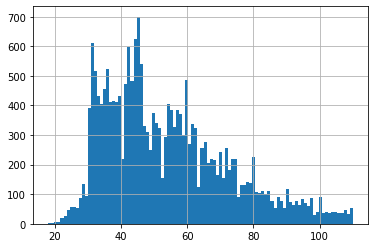

52.0

count    22138.000000
mean        59.770599
std         33.006088
min         18.400000
25%         40.000000
50%         52.000000
75%         69.000000
max        495.000000
Name: total_area, dtype: float64

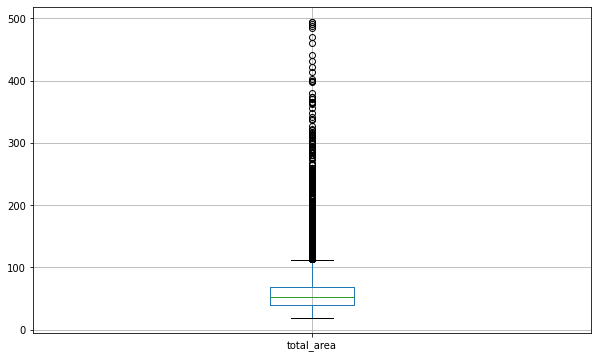

In [ ]:
#вывожу распределение данных
df['total_area'].hist(bins=100,range=(18,110))
plt.show()
df.boxplot(column=['total_area'],figsize=(10,6),grid=True)
display(df['total_area'].median())
df['total_area'].describe()

На гистограмме видно, что распределение значений смещено влево. Большинство выбросов приходится на квартиры с метражом, значительно превышающим медианное значение данной характеристики. Это подтверждается и разницей между медианой (52) и средним арифметическим (59.7).
Выбросов довольно много: в данном случае ими являются значения больше 110. Также высокое значение у стандартного отклонения (32.8), что указывает на неоднородность анализируемых показателей.
Несмотря на то, что в ходе предобработки данных из датафрейма уже были удалены редкие примеры квартир с крайне большой площадью, выбросов осталось довольно много и это объясняется тем, что элитного жилья с огромной площадью меньше на рынке недвижимости, так как спрос на такое жилье ниже, потому что мало людей могут себе позволить такую покупку. 
Стоит отметить пиковые значения, которые видны на графике: 30, два значения в диапазоне 42-45 и 60 кв.м. Это объясняется тем, что стандартная площадь однокомнатных, двухкомнатных и трехкомнатных квартир приходится на эти значения.


**Жилая площадь:**

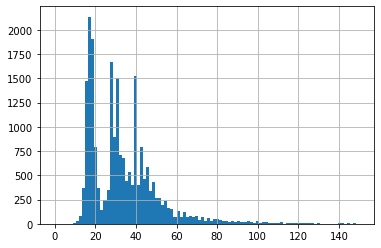

30.1

flat_type
B    16.41
C    17.40
D    27.00
E    39.00
F    45.00
G    39.40
А    14.00
Name: living_area, dtype: float64

count    22138.000000
mean        34.169160
std         20.095029
min          8.300000
25%         19.000000
50%         30.100000
75%         41.800000
max        347.500000
Name: living_area, dtype: float64

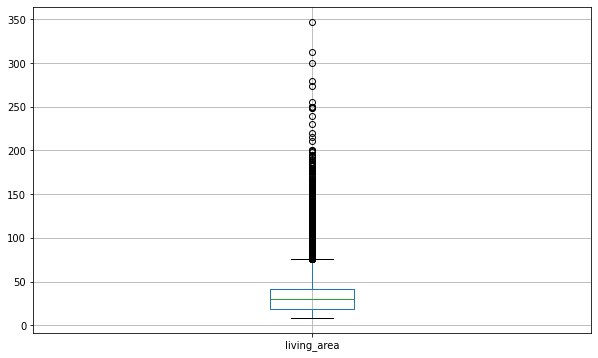

In [ ]:
#вывожу распределение данных
df['living_area'].hist(bins=100,range=(0,150))
plt.show()
df.boxplot(column=['living_area'],figsize=(10,6),grid=True)
display(df['living_area'].median())
display(df.groupby('flat_type')['living_area'].median())
df['living_area'].describe()

Несколько пиков на гистограмме можно объяснить тем, что часть пропущенных значений была заменена одинаковыми числами для каждого типа квартир, разделенных на категории по площади. Опять наблюдается смещение значений в сторону меньшей площади, что неудивительно, так как жилая площадь напрямую связана с общей площадью квартиры. Выбросами являются значения превышающие 75 кв.м. Медиана(30.1) и среднее арифметическое (34.1) отличаются меньше, чем в предыдущем случае.

**Площадь кухни:**

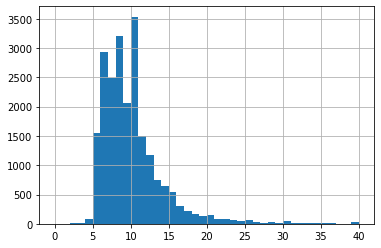

9.0

flat_type
B     6.0
C     8.4
D     7.7
E    10.0
F    10.3
G    10.5
А     2.7
Name: kitchen_area, dtype: float64

count    22138.000000
mean        10.046800
std          4.786652
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64

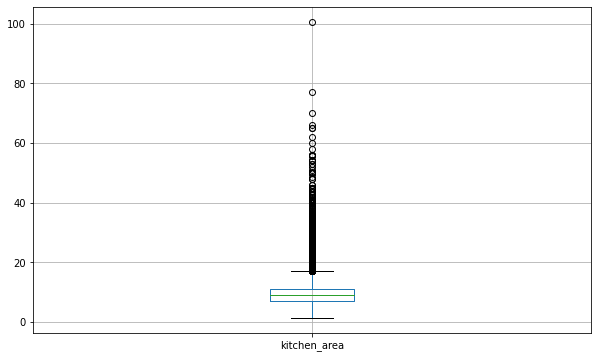

In [ ]:
#вывожу распределение данных
df['kitchen_area'].hist(bins=40,range=(0,40))
plt.show()
df.boxplot(column=['kitchen_area'],figsize=(10,6),grid=True)
display(df['kitchen_area'].median())
display(df.groupby('flat_type')['kitchen_area'].median())
df['kitchen_area'].describe()

Аналогично предыдущему пункту, наличие нескольких пиков на гистограмме могут быть связаны с методом обработки пропущенных значений. Распределение значений этого показателя больше похоже на нормальное, чем в предыдущих случаях. Вероятно, это связано с тем, что не имеет смысла увеличивать площадь кухни пропорционально увеличению площади квартиры после определенного значения, так как это помещение с конкретным функциональным предназначением. 
Выбросами будут все значения выше 18, и на гистограмме опять виден длинный хвост справа, связанный с показателем общей площади квартиры. Медиана(9) среднее арифметическое(10) отличаются незначительно, что позволяет сделать вывод о большей однородности значений данной характеристики по сравнению с предыдущими случаями. 

**Цена объекта:**

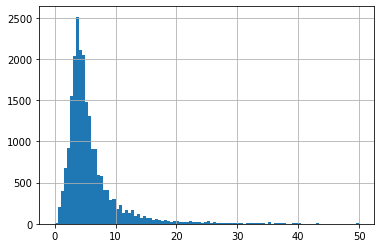

4.6

count    22138.000000
mean         6.229459
std          6.934017
min          0.430000
25%          3.400000
50%          4.600000
75%          6.700000
max        148.000000
Name: price_mill, dtype: float64

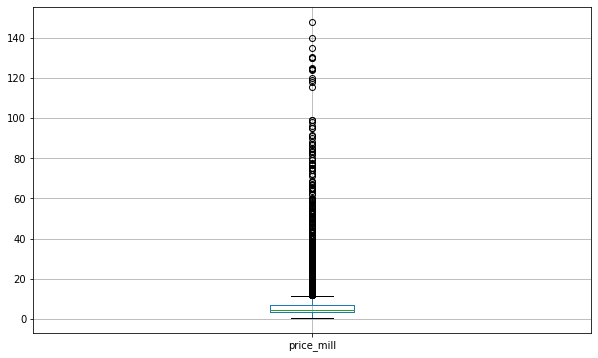

In [ ]:
#для лучшей визуализации данных добавим столбец с ценой в миллионах и используем его
df['price_mill'] =  df['last_price'] / 1000000
#вывожу распределение данных
df['price_mill'].hist(bins=100,range=(0,50))
plt.show()
df.boxplot(column=['price_mill'],figsize=(10,6),grid=True)
display(df['price_mill'].median())
df['price_mill'].describe()

Распределение значений цен объектов похоже на распределение значений общей площади, из чего можно cделать вывод о наличии связи между этими показателями. Среднее(6.2)и медиана(4.6) заметно отличаются, что объясняется смещением распределения значений влево. Выбросами можно считать квартиры дороже 11 миллионов.

**Количество комнат:**

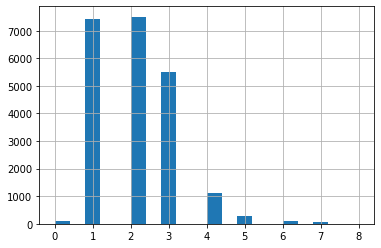

2.0

count    22138.000000
mean         2.075842
std          1.038528
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

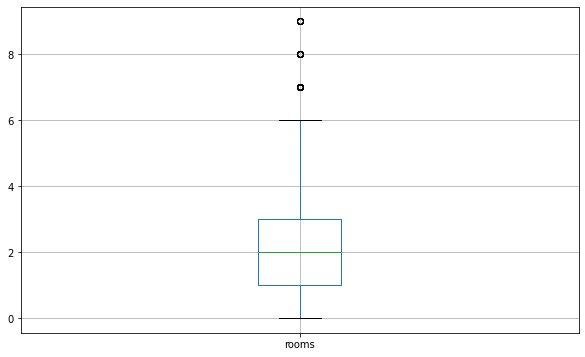

In [ ]:
#вывожу распределение данных
df['rooms'].hist(bins=20,range=(0,8))
plt.show()
df.boxplot(column=['rooms'],figsize=(10,6),grid=True)
display(df['rooms'].median())
df['rooms'].describe()

Так как подавляющая часть квартир не имеет очень большого метража, квартиры с больше, чем шестью комнатами будут считаться выбросами. Медиана (2) и среднее (2.08) практически совпадают: значения в данной подборке довольно однородны, а выбросов мало, что мы и видим на графиках. В абсолютном большинстве квартир количество комнат варьируется в пределах от 1 до 3, далее можно наблюдать резкий спад количества значений. 

**Высота потолков:**

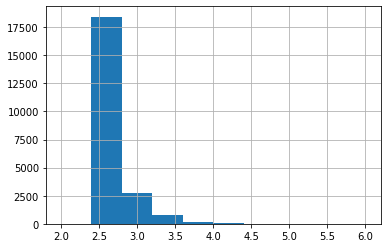

2.7

count    22138.000000
mean         2.699488
std          0.218173
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.500000
Name: ceiling_height, dtype: float64

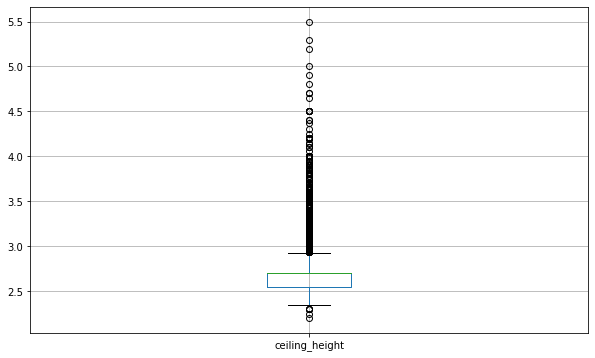

In [ ]:
#вывожу распределение данных
df['ceiling_height'].hist(bins=10,range=(2,6))
plt.show()
df.boxplot(column=['ceiling_height'],figsize=(10,6),grid=True)
display(df['ceiling_height'].median())
df['ceiling_height'].describe()
#проверяю долю пропущенных значений в столбце
#display(df.isna().mean())

Как и в ряде предыдущих случаев, график смещен влево, что связано с повышенным предложением недорогих квартир с меньшими характристиками общей площади, количества комнат, высоты потолка и т.д. Выбросами считаются значения больше 2.9 и меньше 2.4. Медиана (2.7) и среднее арифметическое (2.698) фактически равны. Стандартное отклонение (0.22) также невелико, следовательно, данные довольно однородные, а процент выбросов не очень большой, и большинство таких значений не превышает 3.2 метра, то есть два стандартных отклонения.

**Этаж квартиры:**

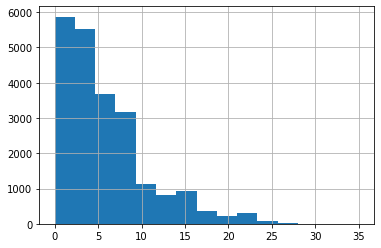

4.0

count    22138.000000
mean         5.855136
std          4.834677
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

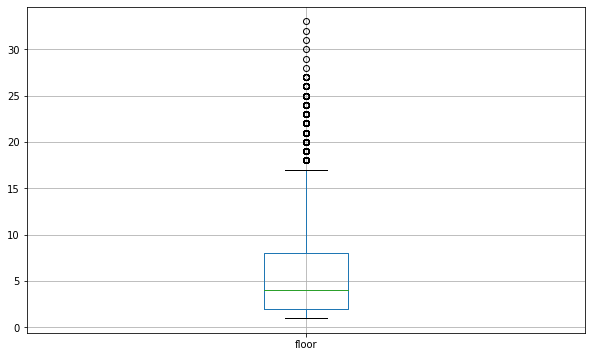

In [ ]:
#вывожу распределение данных
df['floor'].hist(bins=15,range=(0,35))
plt.show()
df.boxplot(column=['floor'],figsize=(10,6),grid=True)
display(df['floor'].median())
df['floor'].describe()

В Санкт-Петербурге есть серьезные ограничения на высотность домов при строительстве, а в Ленобласти (за исключением населенных пунктов напрямую граничащих с городом) необходимости в большом количестве многоэтажных домов нет из-за сравнительно низкой плотности населения, что приводит к тому, что относительно небольшой процент квартир находится в высоких многоэтажных домах (более 14 этажей). В связи с этим, неудивительно, что, согласно графикам, большинство квартир расположены не выше 17 этажа, остальные значения будут считаться выбросами. Медиана (4) и среднее арифметическое (5.86) заметно отличаются, а стандартное отклонение составляет 4.8 этажа, это позволяет сделать вывод о невысокой однородности данных. 

**Тип этажа квартиры:**

count      22138
unique         3
top       другой
freq       16283
Name: floor_type, dtype: object

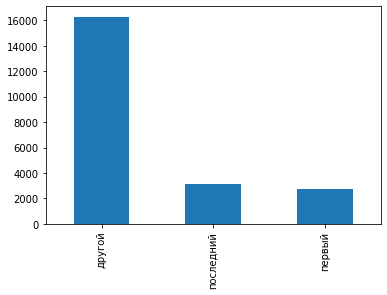

In [ ]:
#вывожу распределение данных
df.floor_type.value_counts().plot.bar()
df['floor_type'].describe()

Приблизительно одинаковое число квартир находится на первом или последнем этаже, с небольшим преимуществом второго варианта. Ожидаемо, большинство квартир расположено не на первом и не на последнем этажах, так как шанс оказаться в типе "другой" намного выше. 

**Общее количество этажей в доме:**

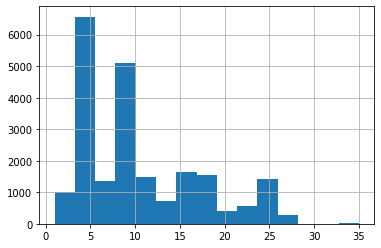

9.0

count    22138.000000
mean        10.629822
std          6.545932
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

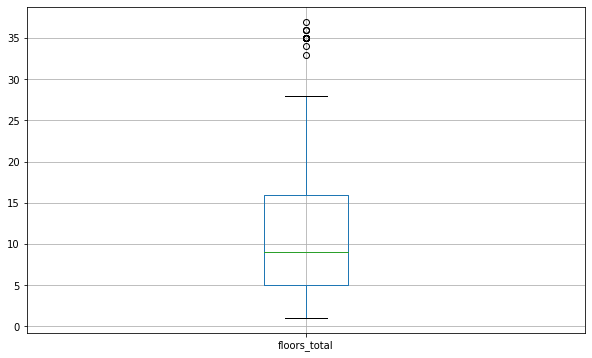

In [ ]:
#вывожу распределение данных
df['floors_total'].hist(bins=15,range=(1,35))
plt.show()
df.boxplot(column=['floors_total'],figsize=(10,6),grid=True)
display(df['floors_total'].median())
df['floors_total'].describe()

На гистограмме видны пики значений, соответствующих этажности типовых домов: 5,9,14,25 этажей. По обозначенным ранее причинам в большинстве случаев количество этажей не превышает 15. Выбросами же будут считаться дома с более, чем 28 этажами.

**Расстояние до центра города в метрах:**

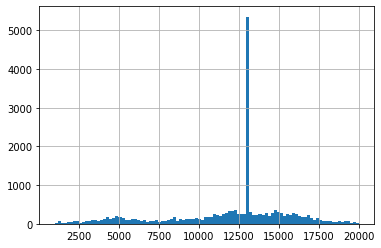

13101.0

count    22138.000000
mean     14027.644706
std       7559.890603
min        181.000000
25%      11050.000000
50%      13101.000000
75%      15304.500000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

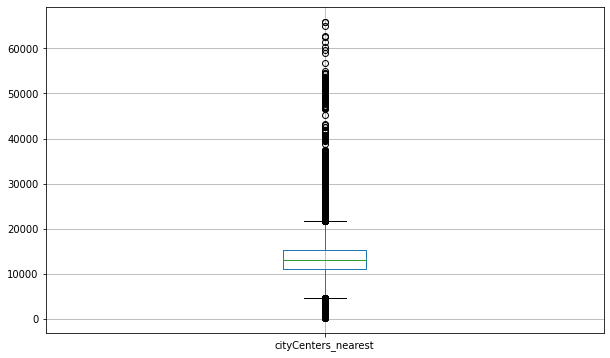

In [ ]:
#вывожу распределение данных
df['cityCenters_nearest'].hist(bins=100,range=(1000,20000))
plt.show()
df.boxplot(column=['cityCenters_nearest'],figsize=(10,6),grid=True)
display(df['cityCenters_nearest'].median())
df['cityCenters_nearest'].describe()
#считаю долю домов, находящихся в Санкт-Петербурге
#display((df['locality_name']=='санкт-петербург').mean())

Так как 66% квартир находится в Санкт-Петербурге, а также существенная часть квартир находится в населенных пунктах, граничащих с городом, логично, что большинство квартир находится в пределах 20 км от центра города (приблизительное расстояние от центра Петербурга до границ города - 15-20 км). Выбросами будут считаться значения, превышающие 21 км, и не достигающие 5 км. Можно отметить довольно большое стандартное отклонение, составляющее 7.5 км, однако медиана (13 км) и среднее (14 км) отличаются несущественно. 
Стоит отметить наличие огромного пика на значении 13 км, который вероятно связан с способом обработки пропущенных значений. 

**Расстояние до ближайшего аэропорта:**

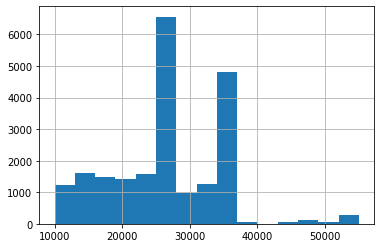

26763.5

count    22138.000000
mean     27112.094634
std       9546.679667
min       6450.000000
25%      20969.750000
50%      26763.500000
75%      34529.000000
max      84853.000000
Name: airports_nearest, dtype: float64

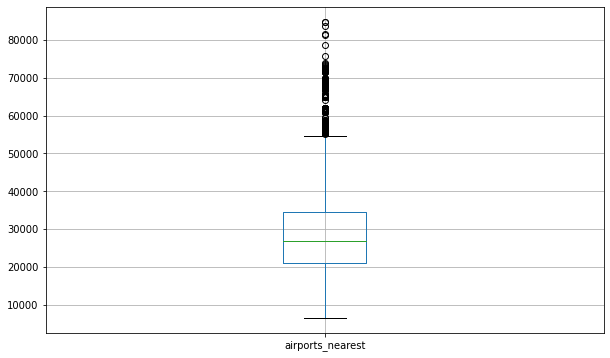

In [ ]:
#вывожу распределение данных
df['airports_nearest'].hist(bins=15,range=(10000,55000))
plt.show()
df.boxplot(column=['airports_nearest'],figsize=(10,6),grid=True)
display(df['airports_nearest'].median())
df['airports_nearest'].describe()

Опять же, так как большая часть квартир находится либо в Петербурге, либо в близких к Петербургу населенных пунктах Ленобласти, расстояние до аэропорта варьируется в диапазоне от 10 до 55 км, большие значения являются выбросами. Как и в предыдущем случае, медиана(26.8) и среднее(27.1) близки по значениям, при этом стандартное отклонение имеет относительно высокое значение - 9.5 км.

**Расстояние до ближайшего парка:**

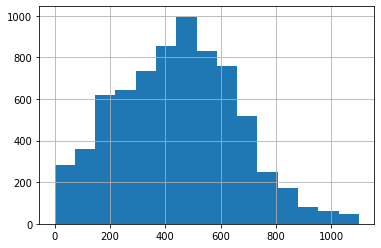

456.0

count    7482.000000
mean      490.254076
std       335.665469
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

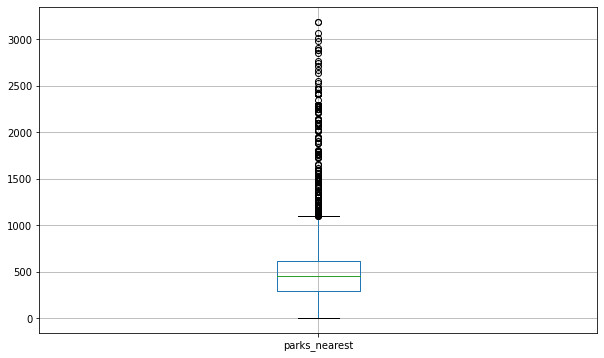

In [ ]:
#вывожу распределение данных
df['parks_nearest'].hist(bins=15,range=(0,1100))
plt.show()
df.boxplot(column=['parks_nearest'],figsize=(10,6),grid=True)
display(df['parks_nearest'].median())
df['parks_nearest'].describe()

В отличие от предыдущих случаев, в этот раз распределение значений похоже на нормальное с длинным хвостом вправо. Это можно объяснить тем, что расстояние до парка не зависит от других рассматриваемых факторов: от площади квартиры, высотности здания, близости к аэропорту. Поэтому не наблюдается смещения графика влево, которое было заметно ранее. В большинстве случаев ближайший парк расположен в диапазоне от 300 до 600 метров, значения выше 1100 м будут считаться выбросами. Стоит отметить, что на выводы могло повлиять большое количество пропущенных данных (66%) - максимальное из всех показателей.

**День и месяц публикации объявления:**

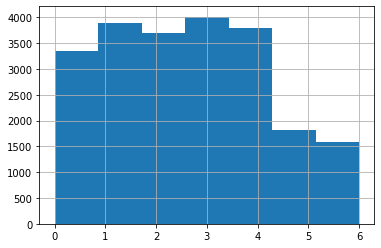

3.0

count    22138.000000
mean         2.577469
std          1.788769
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

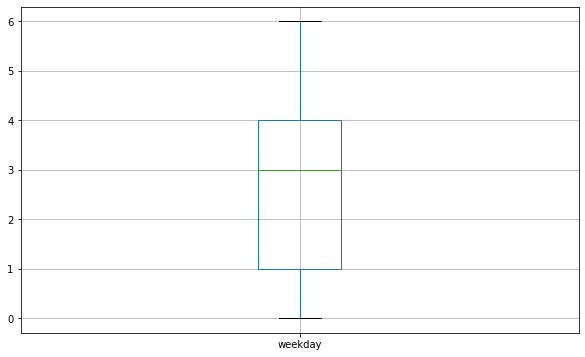

In [ ]:
#вывожу распределение данных
df['weekday'].hist(bins=7,range=(0,6))
plt.show()
df.boxplot(column=['weekday'],figsize=(10,6),grid=True)
display(df['weekday'].median())
df['weekday'].describe()

Большинство объявлений было размещено в течение рабочей недели, что можно объяснить, например, тем, что объявления размещались риэлторскими компаниями, а не владельцами квартир лично. На выходных было подано примерно в 2.5 раза меньше объявлений.

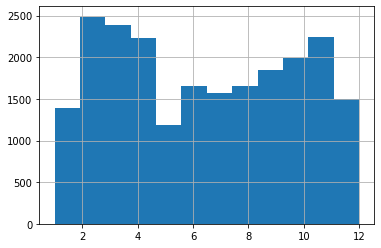

6.0

count    22138.000000
mean         6.401301
std          3.489197
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

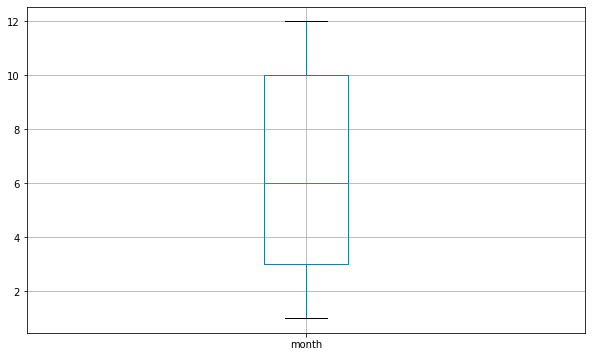

In [ ]:
#вывожу распределение данных
df['month'].hist(bins=12,range=(1,12))
plt.show()
df.boxplot(column=['month'],figsize=(10,6),grid=True)
display(df['month'].median())
df['month'].describe()

Заметны существенные провалы в значениях, соответствующих январю, маю и декабрю. Объяснением может служить большое количество нерабочих дней в январе и мае и высокую степень занятости людей в предновогодний период, заставляющую многих перенести дела на вторую половину января. Можно также отметить небольшое снижение значений в летние месяцы, которое может быть связано с отпускным сезоном.

Изучим, как быстро продавались квартиры.

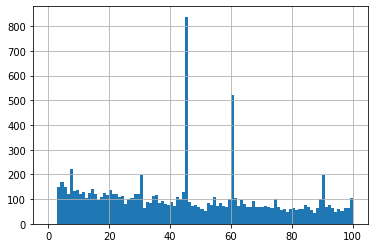

'Медиана:90'

'Среднее:151'

count    19058.00000
mean       151.20679
std        156.47477
min          3.00000
25%         43.00000
50%         90.00000
75%        208.00000
max        730.00000
Name: days_exposition, dtype: float64

In [ ]:
#вывожу распределение данных
df['days_exposition'].hist(bins=100,range=(0,100))
plt.show()
display(f"Медиана:{int(df['days_exposition'].median())}")
display(f"Среднее:{int(df['days_exposition'].mean())}")
df['days_exposition'].describe()

Гистограмма показывает очень интересные пиковые значения: 7, 30, 45, 60 и 90 дней. Можно предположить, что такое четкое разделение на неделю, один, полтора, два и три месяца связано связано не только со скоростью продажи, но и с особенностями размещения объявлений на сайте о продаже недвижимости. Ведь *days_exposition* показывает количество дней от размещения объявления до снятия его с сайта, а снятие с сайта может происходить не только из-за продажи, но и по другим причинам (например, клиент может решить, что этот сайт работает неэффективно и выбрать другой, передумать продлевать размещение объявления, если квартира не продается быстро, а цена размещения объявления кажется недешевой, также возможно клиенты могут забыть снять объявления с сайта после продажи квартиры, и тогда они автоматически снимаются после того, как заканчивается оплаченный период). Можно также предположить, что на сайте с объявлениями есть тарифы на 1 неделю, месяц, и возможно  на две недели или же полтора месяца. Тогда пиковые значения могут отражать как раз-таки непродления размещений. <br>
Тем не менее, в рамках данного исследования у нас нет возможности проверить причину снятия объявления с сайта, поэтому будем исходить из того, что причина во всех случаях - продажа квартиры. <br>
Для оценки скорости продаж можно использовать квартили распределения: значения, входящие в Q1, можно считать быстрыми продажами, а в Q4 - долгими. Таким образом, продажи, совершенные быстрее, чем 1.5 месяца с момента публикации объявления, можно считать быстрыми. А продажи, занявшие более 7 месяцев - долгими. Необычайно долгими продажами можно считать значения, которые на гистограмме практически сливаются с осью X, то есть продажи, занявшие более 20 месяцев. Из-за большого стандартного отклонения для оценки среднего времени продажи используем медиану, а не среднее арифметическое: обычно продажи занимают около 3 месяцев.

Выясним, какие факторы больше всего влияют на общую стоимость объекта.

0.7493786608789971

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

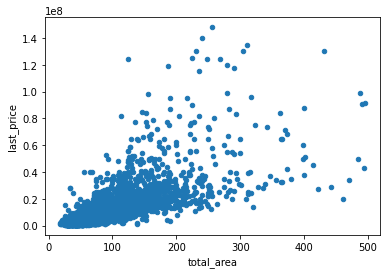

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['total_area']))
df.plot(x='total_area',y='last_price',kind='scatter')

Самая значительная корреляция заметна между ценой объекта и общей площадью квартиры. Влияние общей площади на цену особенно повышается для квартир с площадью более 100 кв.м. 

0.6481521706179949

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

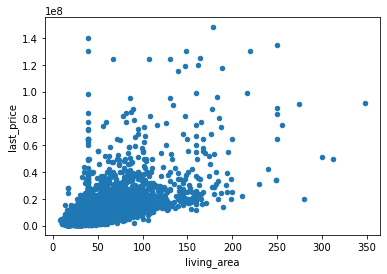

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['living_area']))
df.plot(x='living_area',y='last_price',kind='scatter')

Схожая ситуация наблюдается и с зависимостью цены объекта от жилой площади. Коэффициент корреляции ниже, чем в предыдущем случае, однако значительно выше, чем в наблюдениях, не связанных с характеристиками метража квартиры. 

0.5408391996700587

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

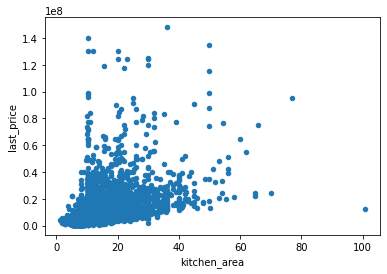

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['kitchen_area']))
df.plot(x='kitchen_area',y='last_price',kind='scatter')

Площадь кухни связана с площадью квартиры, поэтому корреляция с ценой остается довольно сильной, однако она ниже, чем у общей и жилой площади, так как площадь квартиры после определенного значения перестает увеличиваться пропорционально увеличению общей площади.

0.4558137566400131

<AxesSubplot:xlabel='rooms', ylabel='price_mill'>

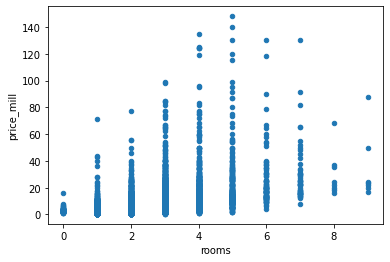

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['rooms']))
df.plot(x='rooms',y='price_mill',kind='scatter')

Как показывают коэффициент корреляции и диаграмма рассеяния, связь между ценой объекта и количеством комнат есть, но она не настолько сильная и стабильная, чтобы сделать вывод о прямой зависимости. Действительно среди объектов с маленьким количеством комнат мало дорогих квартир, это напрямую связано с общей площадью площадью квартир, у которой довольно сильный (0.77) коэффициент корреляции с количеством комнат. То есть можно сказать, что это общая площадь влияет на корреляцию между количеством комнат и ценой объекта. Тем не менее, начиная с 6 комнат данный показатель уменьшает степень своего влияния на цену объекта.

1    16283
2     3125
0     2730
Name: floor_type_number, dtype: int64

<AxesSubplot:xlabel='floor_type_number', ylabel='price_mill'>

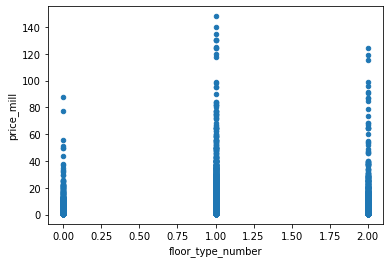

In [ ]:
#перевожу значения str в int, чтобы построить график 
def floor_type_number(num):
     if num == 'первый':
        return 0
     if num == 'другой':
        return 1
     if num == 'последний':
        return 2
df['floor_type_number'] = df['floor_type'].apply(floor_type_number)
display(df['floor_type_number'].value_counts())
#строю график
df.plot(x='floor_type_number',y='price_mill',kind='scatter')

Распределение значений, которое можно увидеть на графике, почти пропорционально количеству объявлений с каждым из типов квартир. Отличие составляет существенно меньшее количество дорогих квартир и отсутствие очень дорогих, элитных квартир (дороже 90 млн) на первом этаже. Это можно объяснить тем, что зачастую квартиры, расположенные на первом этаже, дешевле аналогичных по остальным параметрам квартир, которые расположены выше, из-за повышенного уровня шума, более высокой угрозы криминала, худшего качества воздуха и т.д. Можно также отметить, что очень дорогие квартиры в большинстве своем не расположены на последнем этаже, а дорогих квартир там мало. Это можно объяснить и статистически (квартир, расположенных на последнем этаже, меньше, чем расположенных между первым и последним этажом, а значит и их распределение может существенно отличаться), но также это можно объяснить и недостатками жизни на последнем этаже, из-за которых такие квартиры могут быть ниже в цене: протечка крыш, серьезные неудобства в случае поломки лифта, не говоря уже о его отсутствии и т.д. <br>
Таким образом, можно отметить наличие связи между типом этажа квартиры и ее ценой. Расположение на первом этаже очень негативно влияет на цену, также как и расположение на последнем этаже, которое, однако, в меньшей степени оказывает отрицательное влияние на ценообразование. Большинство дорогих и очень дорогих квартир расположено на других этажах. 

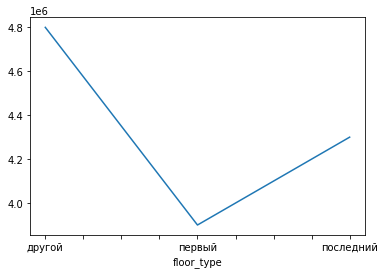

In [ ]:
#строю график
df.groupby('floor_type')['last_price'].median().plot();

-0.0010788420579976995

<AxesSubplot:xlabel='weekday', ylabel='price_mill'>

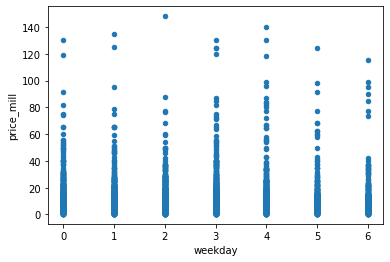

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['weekday']))
df.plot(x='weekday',y='price_mill',kind='scatter')

Корреляции между днем недели опубликования объявления и ценой объекта не обнаружено.

0.004782874081896376

<AxesSubplot:xlabel='month', ylabel='price_mill'>

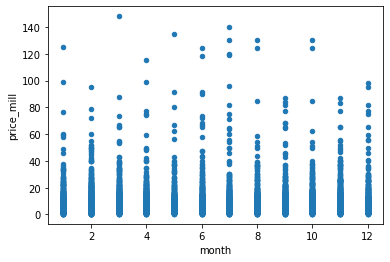

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['month']))
df.plot(x='month',y='price_mill',kind='scatter')

Корреляции между месяцем опубликования объявления и ценой объекта не обнаружено. Однако, можно отметить чуть большее количество очень дорогих объектов в середине года, и меньшее - в конце года. 

-0.04290530550838687

,price_mill
year,
2014,58
2015,748
2016,2438
2017,7926
2018,8189
2019,2779


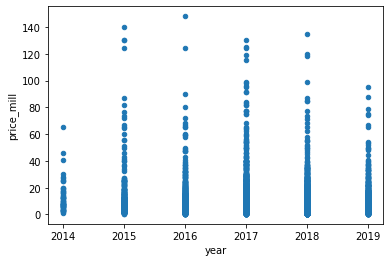

In [ ]:
#считаю корреляцию и строю график
display(df['last_price'].corr(df['year']))
df.plot(x='year',y='price_mill',kind='scatter')
years = df.pivot_table(index='year',values='price_mill',aggfunc='count')
display(years)

Корреляции нет, так как нет ни нисходящего, ни восходящего тренда. Меньше всего дорогих объектов было опубликовано в 2014 году. Однако, именно в этот год было опубликано минимальное количество объявлений, что может объяснить маленькое количество дорогих объектов.

Найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра среди 10 населенных пунктов с наибольшим количеством объявлений.

In [ ]:
#ищу населенные пункты по указанным характристикам 
top_cities = df['locality_name'].value_counts().head(10)
top_cities_prices = df.query('locality_name in @top_cities.index').pivot_table(index= \
                                                                'locality_name',values='mtr_price',aggfunc='median').reset_index()
top_cities_prices = top_cities_prices.round(1)
display(top_cities_prices.sort_values('mtr_price',ascending=False))

,locality_name,mtr_price
9,санкт-петербург,104285.0
8,пушкин,99987.0
3,деревня кудрово,92089.0
6,поселок парголово,90837.0
5,поселок мурино,85322.0
7,поселок шушары,76438.5
4,колпино,74657.0
2,гатчина,67073.0
0,всеволожск,65667.0
1,выборг,58158.0


Из 10 рассматриваемых населенных пунктов самая высокая стоимость квадратного метра в Санкт-Петербурге, Пушкине и в Кудрово. Самая низкая - в Выборге, за ним следуют Всеволожск и Гатчина. 

Выясним, как стоимость объектов зависит от расстояния до центра города.

0.9259507728570782

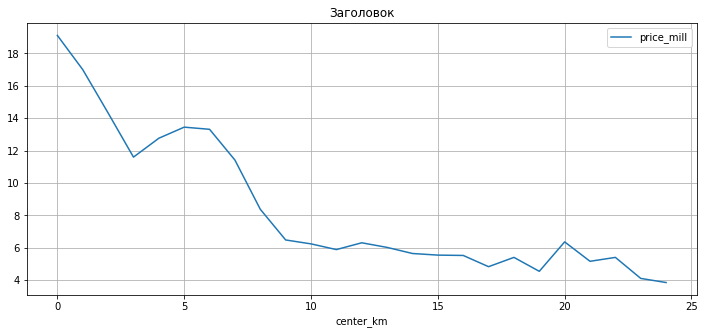

In [ ]:
#ищу взаимосвязь между ценой квартир и расстоянием до центра города
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='center_km',values='price_mill')
    .plot(grid=True,figsize=(12,5), title = 'Заголовок')
)
#если оставить значения 0, то есть квартиры находящиеся в центре города, в цене за км появятся значения 
#inf из-за деления на ноль, также так как мы считаем именно расстояние ДО центра, то квартиры в центре
#нас не интересуют, можно их удалить, так как таких квартир мало 
df = df[df['center_km'] > 0]
df['spb_km_price'] = (df['price_mill'] / df['center_km']).round(1)
display(df['spb_km_price'].mean())

Неудивительно, что чем ближе объекты находятся к центру города, тем выше цена. В диапазоне 1-7 км от центра города цена за 1 километр самая высокая, пиковыми значениями являются 1 и 5 км от центра. Далее заметен небольшой пик в районе 20 км - это скорее всего связано с границей города, так как кваритиры, расположенные за границей города, которые могли остаться в датафрейме после обработки данных, будут стоить дешевле, чем те, что находятся в Санкт-Петербурге, пусть и на том же расстояние от центра. 
Несмотря на то, что расстояние от центра - это не единственный фактор, влияющий на цену объекта, общий тренд очевиден. Особенно сильно близость к центру влияет на цену в пределах 7 км от центра города. Далее влияние данного фактора снижается, и почти нивелируется, начиная с 10 км от центра. Средняя цена каждого километра - 925950 рублей. 

В ходе данного шага были проанализированы важнейшие параметры квартир и на основании исследовательского анализа были сделаны выводы о главных факторах ценообразования при продаже жилья в Санкт-Петербурге и Ленинградской области. Во-первых, стоит отметить, что после обработки данных оставшиеся значения оказались довольно однородными, а в случае наличия значительного числа выбросов, они все равно не мешали проведению анализа исследуемых параметров. При изучении целого ряда характеристик было заметно значительное влияние преимущества в количестве недорогих и не очень дорогих квартир, это влияло на распределение значений приблизительно в половине исследуемых параметров. На основании изученных показателей, можно сделать вывод о том, что в наибольшей степени на цену квартиры влияют прямые и косвенные характеристики, связанные с метражом квартиры (метраж, количество комнат). Также влияние оказывает близость к центру города, однако, лишь в пределах 10 км, далее влияние становится незначительным. Тип этажа квартиры (первый, последний, другой) также имеет значение при формировании цены: расположение квартиры на первом этаже отрицательно влияет на ее цену, а на последнем - также отрицательно, но в меньшей степени. Самые дорогие объекты находятся либо непосредственно в городе (Санкт-Петербург), либо являются его составной частью (Пушкин - город в городе), либо находятся в непосредственной близости к границам города - Кудрово. 

## Выводы

В рамках исследования было рассмотрено более 23000 объявлений, на основании которых изучалось влияние раличных параметров квартир в Санкт-Петербурге и Ленинградской области на ценообразование при их продаже.
На начальном этапе была произведена обработка данных, а именно были удалены аномальные и редкие показатели, по возможности заполнены пропущенные значения, убраны дубликаты и добавлены новые важные для исследования параметры на основании имеющейся в таблице информации. Были подробно изучены и проанализированы ключевые характеристики квартир: общая и жилая площадь, площадь кухни, количество комнат, цена и этаж квартиры, этажность дома, высота потолков, картографические параметры квартиры, а также день недели, месяц и год размещения объявления на сайте. Была изучена скорость продажи квартир и факторы, в наибольшей степени влияющие на формирование цены при продаже. Были выявлены населенные пункты с самой низкой и высокой ценой за квадратный метр, а также была определена степень влияния близости к центру города на цену квартир и высчитана средняя цена каждого километра до центра.  <br>
На основании проведенного исследования были сделаны следующие выводы.
<br>
Наибольшее влияние на цену квартиры оказывают характеристики, связанные с ее площадью, а именно в порядке уменьшения влияния: общая площадь, жилая площадь, площадь кухни, количество комнат. Расстояние от центра также влияет на цену, особенно в пределах 1-7 км от центра города, начиная с 10 км от центра влияние данного фактора резко снижается. Самая высокая стоимость одного квадратного метра - в Санкт-Петербурге и в Пушкине, являющимся городом в составе Санкт-Петербурга, а из населенных пунктов Ленинградской области - в Кудрово, из чего следует, что расположение квартиры в Петербурге или непосредственной близости к нему положительно влияет на цену квартиры. Этаж, на котором расположена квартира, оказывает влияние на ценообразование: на первом этаже минимальное количество дорогих квартир и отсутствуют очень дорогие, элитные объекты. Также, хоть и в меньшей степени, на цену неблагоприятно влияет расположение квартиры на последнем этаже. В январе, мае и декабре размещается меньшее количество объявлений о продаже дорогих квартир, однако, это связано с тем, что общее количество поданных объявлений ниже именно в эти месяцы. Аналогичная ситуация и с днем недели подачи объявления - в течение рабочей недели подается больше объявлений, а значит и количество новых дорогих объектов выше именно в эти дни. Быстрыми продажами стоит считать квартиры, проданные менее, чем за 1.5 месяца, долгими - более, чем за 7 месяцев, необычно долгими - дольше 20 месяцев.